# scipy.optimize.minimize例子

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.24919264636877522
       x: [ 1.617e-03  5.398e+00  6.569e+00]
     nit: 7
     jac: [ 5.139e-09 -3.178e-06 -3.182e-06]
    nfev: 43
    njev: 43


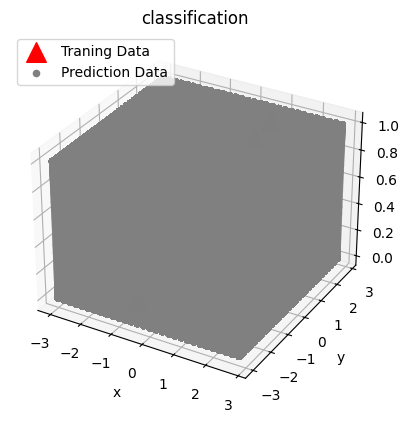

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

""" X 是训练集的数据 """
X_train = np.array([[1., 1.],
                    [1., 2.],
                    [-1., -1.],
                    [-1., -2.]])

""" Y 是训练集的label """
y_train = np.array([1, 1, 0, 0])

""" 处理训练集X, 补上x_0 """
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

def cost(theta, X, y):
    first = -y.T @ np.log(sigmoid(X @ theta))
    second = (1 - y.T) @ np.log(1 - sigmoid(X @ theta))
    return ((first / second) / (len(X))).item()

def hypothesis(X, theta):
    return sigmoid( X @ theta)

def cost_wrapper(theta):
    return cost(theta, X_train, y_train)

def hypothesis_wrapper(theta):
    return hypothesis(X_train, theta)

def gradient(theta):
    ret = (1 / X_train.shape[0]) *  ((hypothesis_wrapper(theta) - y_train).T @ X_train)
    return ret


theta_train = np.array([1, 1.,2.])

theta_opt = optimize.minimize(cost_wrapper, theta_train, method='CG', jac=gradient)
print(theta_opt)

""" 构造预测集数据 """
delta = 0.2
px = np.arange(-3.0, 3.0, delta)
py = np.arange(-3.0, 3.0, delta)
px, py = np.meshgrid(px, py)
px = px.reshape((px.size, 1))
py = py.reshape((py.size, 1))
pz = np.hstack((np.hstack((np.ones((px.size, 1)), px)), py))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 2], y_train, color='red', marker='^', s=200, label='Traning Data')  # plot训练集
ax.scatter(px, py, (hypothesis(pz, theta_opt.x)), color='gray', label='Prediction Data')  # plot预测集, 分类时加上 np.around
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('classification')
plt.show()